In [34]:
import copy

import polars as pl
import polars.selectors as cs

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import TransformedTargetRegressor

from modules.utils import data_utils
from modules.types.constants_sedds import FeatureCategory

# Exploratory analysis of PDI

- **A higher PDI in the resulting formulation may indicate that the emulsion requires further improvement (based on scatter plot below).**
- The following exploratory analysis of the Polydispersity Index (PDI) is performed to gain some insights about the emulsification quality of the resulting SEDDS formulation.
- The available data on PDI is not enough to perform robust analysis.


In [38]:
sedds_features = copy.copy(FeatureCategory.SEDDS.value)
sedds_features

['size', 'PDI', 'cplx_minmax_norm', 'progressed']

In [39]:
target = 'PDI'
progressed = 'progressed'

In [20]:
sedds_features.remove(target)
unvailable_input = sedds_features

In [4]:
data = data_utils.load_data()

In [30]:
data_PDI_progressed = (
    data.select([target, progressed])
    .drop_nulls()
)
data_PDI_progressed.describe()


statistic,PDI,progressed
str,f64,str
"""count""",289.0,"""289"""
"""null_count""",0.0,"""0"""
"""mean""",0.250784,null
"""std""",0.146898,null
"""min""",0.02,null
"""25%""",0.145,null
"""50%""",0.23,null
"""75%""",0.32,null
"""max""",0.949,null


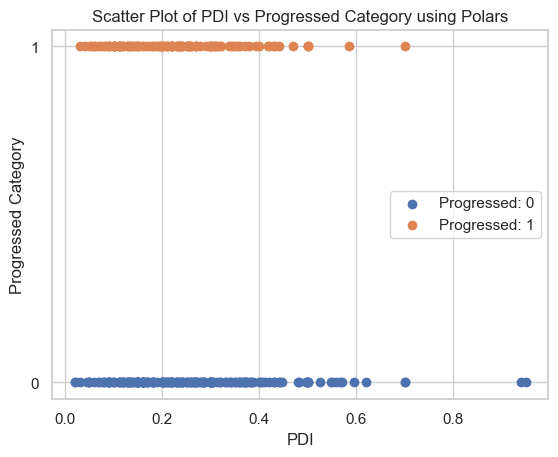

In [56]:
fig, ax = plt.subplots()

unique_categories = data_PDI_progressed[progressed].unique().to_list()
list(map(lambda category: ax.scatter(
    data_PDI_progressed.filter(pl.col(progressed) == category)[target].to_numpy(), 
    [category] * len(data_PDI_progressed.filter(pl.col(progressed) == category)), 
    label=f'Progressed: {category}'
), unique_categories))

ax.set_xlabel('PDI')
ax.set_ylabel('Progressed Category')
ax.set_title('Scatter Plot of PDI vs Progressed Category using Polars')
ax.legend()
plt.show()

<Axes: ylabel='Count'>

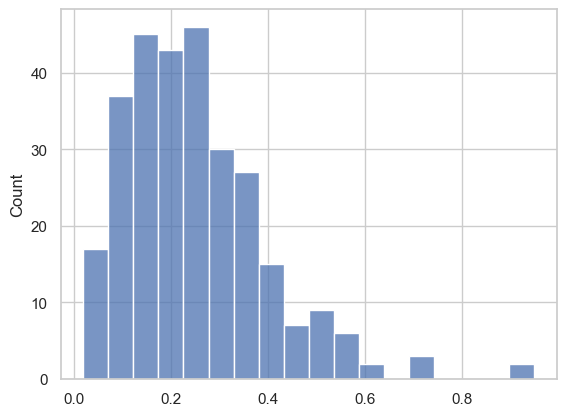

In [35]:
sns.histplot(data[target]) 

- Are outliers significant enough to remove it from the data?
- Not enough data to perform such analysis.

<Axes: ylabel='Count'>

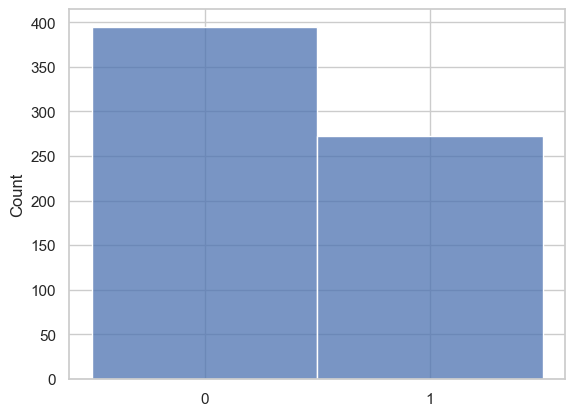

In [33]:
sns.histplot(data[progressed]) 

In [43]:
data = (data
 .drop(unvailable_input)
 .drop_nulls()
)

In [37]:
data.describe()

statistic,PDI,API_prop,oil_total,surfactant_total,cosolvent_total,other_total,o_num,s_num,c_num,other_num,API_mol_wt,logp_chemaxon,API_melt_temp,API_water_sol,API_polar_sa,API_rot_bond,API_H_bond_donor,API_H_bond_accept,o_LC,o_sat,s_HLB,c_mol_wt,c_melt_temp,c_boil_temp,c_density,c_viscosity
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,str,f64,f64,f64,f64,f64,f64
"""count""",289.0,289.0,289.0,289.0,289.0,289.0,289.0,289.0,289.0,289.0,289.0,289.0,289.0,289.0,289.0,289.0,289.0,289.0,"""289""","""289""",289.0,289.0,289.0,289.0,289.0,289.0
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""0""","""0""",0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",0.250784,5.400779,28.815329,48.279964,16.650692,0.853529,1.221453,1.33564,0.723183,0.121107,474.768646,4.218235,132.268173,0.019883,109.146263,7.723183,1.916955,5.083045,null,null,13.722145,97.878197,-44.042908,121.945328,0.66955,16.449827
"""std""",0.146898,5.787019,19.591131,18.775124,18.299141,4.053647,0.485294,0.657338,0.539594,0.357272,239.076538,1.676409,53.662151,0.046771,74.448158,3.437869,2.260782,3.452056,null,null,2.06022,105.461983,43.958744,94.346954,0.462301,29.750246
"""min""",0.02,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,206.289993,-2.3,59.5,0.00011,6.48,0.0,0.0,2.0,null,null,0.0,0.0,-114.099998,0.0,0.0,0.0
"""25%""",0.145,1.5,9.96,34.259998,0.0,0.0,1.0,1.0,0.0,0.0,360.829987,3.46,80.5,0.0021,52.599998,6.0,1.0,3.0,null,null,13.0,0.0,-76.0,0.0,0.0,0.0
"""50%""",0.23,4.0,24.84,45.0,9.7,0.0,1.0,1.0,1.0,0.0,406.473999,4.46,116.5,0.0126,112.07,7.0,1.0,3.0,null,null,14.3,76.099998,-59.0,188.199997,1.0,1.1
"""75%""",0.32,8.0,45.0,63.759998,28.799999,0.0,2.0,2.0,1.0,0.0,435.519012,5.28,169.0,0.0234,117.68,10.0,2.0,6.0,null,null,15.0,134.199997,0.0,202.0,1.0,4.8
"""max""",0.949,44.439999,99.32,92.0,76.800003,29.969999,2.0,5.0,3.0,2.0,1202.609985,8.06,232.0,0.75,319.609985,15.0,12.0,17.0,null,null,16.9,400.0,32.5,261.200012,1.1,90.0


- We will fit the data to various models to evaluate their performance.


In [50]:
linear_models = {
    'linreg': Pipeline([
        ('fillna', SimpleImputer(strategy="median")),
        ('sc', MinMaxScaler()), 
        ('linreg', LinearRegression())
    ]),
    'rf': Pipeline([
        ('fillna', SimpleImputer(strategy="median")),
        ('sc', StandardScaler()), 
        ('rf', RandomForestRegressor(n_estimators=100, random_state=42))
    ]),
}

In [44]:
data.describe()

statistic,PDI,API_prop,oil_total,surfactant_total,cosolvent_total,other_total,o_num,s_num,c_num,other_num,API_mol_wt,logp_chemaxon,API_melt_temp,API_water_sol,API_polar_sa,API_rot_bond,API_H_bond_donor,API_H_bond_accept,o_LC,o_sat,s_HLB,c_mol_wt,c_melt_temp,c_boil_temp,c_density,c_viscosity
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,str,f64,f64,f64,f64,f64,f64
"""count""",289.0,289.0,289.0,289.0,289.0,289.0,289.0,289.0,289.0,289.0,289.0,289.0,289.0,289.0,289.0,289.0,289.0,289.0,"""289""","""289""",289.0,289.0,289.0,289.0,289.0,289.0
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""0""","""0""",0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",0.250784,5.400779,28.815329,48.279964,16.650692,0.853529,1.221453,1.33564,0.723183,0.121107,474.768646,4.218235,132.268173,0.019883,109.146263,7.723183,1.916955,5.083045,null,null,13.722145,97.878197,-44.042908,121.945328,0.66955,16.449827
"""std""",0.146898,5.787019,19.591131,18.775124,18.299141,4.053647,0.485294,0.657338,0.539594,0.357272,239.076538,1.676409,53.662151,0.046771,74.448158,3.437869,2.260782,3.452056,null,null,2.06022,105.461983,43.958744,94.346954,0.462301,29.750246
"""min""",0.02,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,206.289993,-2.3,59.5,0.00011,6.48,0.0,0.0,2.0,null,null,0.0,0.0,-114.099998,0.0,0.0,0.0
"""25%""",0.145,1.5,9.96,34.259998,0.0,0.0,1.0,1.0,0.0,0.0,360.829987,3.46,80.5,0.0021,52.599998,6.0,1.0,3.0,null,null,13.0,0.0,-76.0,0.0,0.0,0.0
"""50%""",0.23,4.0,24.84,45.0,9.7,0.0,1.0,1.0,1.0,0.0,406.473999,4.46,116.5,0.0126,112.07,7.0,1.0,3.0,null,null,14.3,76.099998,-59.0,188.199997,1.0,1.1
"""75%""",0.32,8.0,45.0,63.759998,28.799999,0.0,2.0,2.0,1.0,0.0,435.519012,5.28,169.0,0.0234,117.68,10.0,2.0,6.0,null,null,15.0,134.199997,0.0,202.0,1.0,4.8
"""max""",0.949,44.439999,99.32,92.0,76.800003,29.969999,2.0,5.0,3.0,2.0,1202.609985,8.06,232.0,0.75,319.609985,15.0,12.0,17.0,null,null,16.9,400.0,32.5,261.200012,1.1,90.0


In [47]:
from sklearn.model_selection import train_test_split

X = data.drop([target] + unvailable_input).to_dummies(cs.categorical()).to_pandas()
y = data[target].to_pandas()

X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=0.20, random_state=42)

In [51]:
rf_model = linear_models.get('rf')
rf_model.fit(X_tr, y_tr).score(X_ts, y_ts)


0.1632651320103783

- Negative R² means only one thing, mean is better prediction.

In [52]:
lin_reg = linear_models.get('linreg')
lin_reg.fit(X_tr, y_tr).score(X_ts, y_ts)

-0.01924363466657364

- We will scale data in a range that linear model might learn some patterns from the data.

In [53]:
t_lin_reg = TransformedTargetRegressor(
    regressor=LinearRegression(), 
    func=np.log, 
    inverse_func=np.exp
)

In [54]:
t_lin_reg.fit(X_tr, y_tr).score(X_ts, y_ts)

/Users/potato/Library/Caches/pypoetry/virtualenvs/sedds-analysis-sVmcoPsY-py3.12/lib/python3.12/site-packages/sklearn/preprocessing/_function_transformer.py:217: UserWarning: The provided functions are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'.
  warnings.warn(


0.030386541005396284

- Too low  R² and the model explains very little of the variance.